In [2]:
import psycopg2
con = psycopg2.connect(
    database='postgres',
    user='postgres',
    password='postgrepassword',
    host='localhost'
)
cur = con.cursor()

In [7]:
table_name = 'visitor_table'
cur.execute(f'SELECT * FROM {table_name} LIMIT 10;')
print(type(cur))
print(cur)
for rec in cur:
    print(rec)

<class 'psycopg2.extensions.cursor'>
<cursor object at 0x000002E26113CC80; closed: 0>
(1, '56323', 'T', datetime.datetime(2024, 2, 10, 12, 13, 26), '0')
(2, '76926', 'N', datetime.datetime(2024, 2, 18, 10, 2, 28), '0')
(3, '76482', 'T', datetime.datetime(2024, 2, 10, 19, 51, 11), '0')
(4, '62053', 'I', datetime.datetime(2024, 2, 19, 7, 12, 3), '0')
(5, '27562', 'O', datetime.datetime(2024, 2, 12, 15, 59, 38), '0')
(6, '99631', 'H', datetime.datetime(2024, 2, 18, 3, 9, 46), '0')
(7, '40612', 'G', datetime.datetime(2024, 2, 18, 0, 3, 35), '0')
(8, '99439', 'R', datetime.datetime(2024, 2, 14, 16, 25, 22), '0')
(9, '68951', 'H', datetime.datetime(2024, 2, 23, 3, 15, 51), '0')
(10, '88161', 'Q', datetime.datetime(2024, 2, 28, 3, 16, 18), '0')


In [8]:
cur.close()
con.close()

In [9]:
import numpy as np
x = np.linspace(0,5,11)
y = x ** 2

In [10]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [11]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

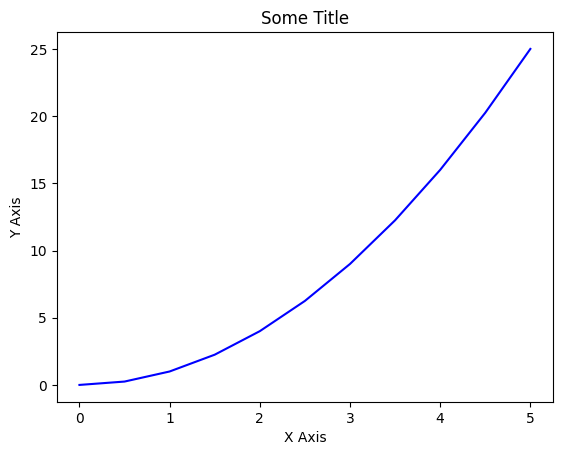

In [12]:
import matplotlib.pyplot as plt
plt.plot(x,y,'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Some Title')
plt.show()

Text(0.5, 1.0, 'Some Title, squared')

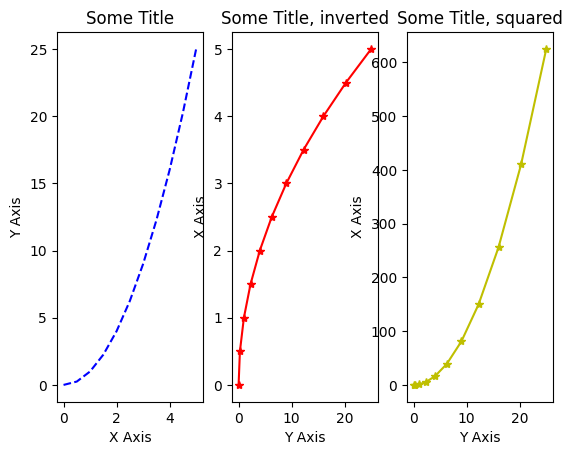

In [20]:
plt.subplot(1,3,1)
plt.plot(x, y, 'b--')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Some Title')

plt.subplot(1,3,2)
plt.plot(y, x, 'r*-')
plt.xlabel('Y Axis')
plt.ylabel('X Axis')
plt.title('Some Title, inverted')

plt.subplot(1,3,3)
plt.plot(x*x, y*y, 'y*-')
plt.xlabel('Y Axis')
plt.ylabel('X Axis')
plt.title('Some Title, squared')

Text(0, 0.5, 'X Axis')

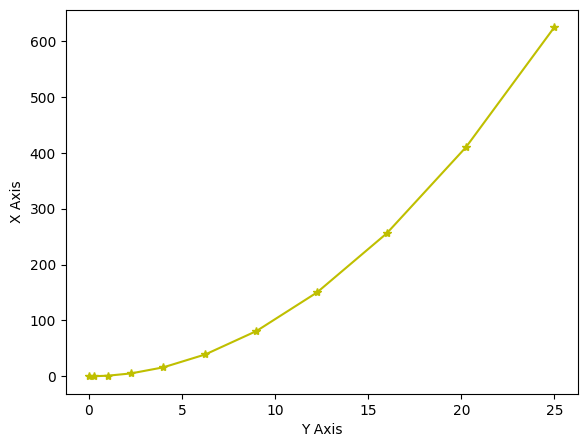

In [25]:
# plt.subplot(1,3,1)
# plt.plot(x, y, 'b--')
# plt.xlabel('X Axis')
# plt.ylabel('Y Axis')
# plt.title('Some Title')

# plt.subplot(1,3,2)
# plt.plot(y, x, 'r*-')
# plt.xlabel('Y Axis')
# plt.ylabel('X Axis')
# plt.title('Some Title, inverted')

# plt.subplot(1,3,3)
# plt.plot(x*x, y*y, 'y*-')
# plt.xlabel('Y Axis')
# plt.ylabel('X Axis')
# plt.title('Some Title, squared')

fig = plt.figure()
axes = fig.add_axes([0.5,0.7,0.8,0.8])
axes.plot(x*x, y*y, 'y*-')
axes.set_xlabel('Y Axis')
axes.set_ylabel('X Axis')

In [24]:

table_name = 'users'

In [40]:
import psycopg2
pg_con = psycopg2.connect(
    database='postgres',
    user='postgres',
    password='postgrepassword',
    host='localhost'
)
pg_cur = pg_con.cursor()
# pg_cur.execute(pg_query)

# Collect columns
pg_query = f"""SELECT column_name FROM INFORMATION_SCHEMA.COLUMNS WHERE table_name = '{table_name}';"""
pg_cur.execute(pg_query)
pg_data = pg_cur.fetchall()
pg_columns = []
for i in pg_data:
    pg_columns.append(i[0])
print(pg_columns)

# Collect Data
pg_query = f"""SELECT {','.join(pg_columns)} FROM {table_name} LIMIT 10;"""
pg_cur.execute(pg_query)
pg_data = pg_cur.fetchall()
pg_content = []
for i in pg_data:
    pg_content.append(i)
print(pg_content)

# Push to DataFrame
import pandas as pd
pg_df = pd.DataFrame(pg_content,columns=pg_columns)

# Close connection
pg_con.commit()
pg_cur.close()
pg_con.close()

['user_id', 'manager_id', 'employee_id', 'supervisor_id', 'phone_number', 'address', 'city', 'state', 'postal_code', 'country', 'date_of_birth', 'gender', 'nationality', 'job_title', 'department', 'salary', 'hire_date', 'termination_date', 'employee_type', 'employee_status', 'performance_rating', 'work_location', 'first_name', 'last_name', 'email']
[(12, 7, 12, 7, '755-241-8259', '052 Springs Crossing', 'Jianggu', None, None, 'China', '8/21/1992', 'Male', 'China', 'Social Worker', 'Services', '173499.16', '6/30/2002', '1/3/2005', 'Full-time', 'Inactive', '4.0', 'Remote', 'Zeb', 'Bowater', 'zbowaterb@scientificamerican.com'), (665, 24, 665, 366, '803-800-2254', '02147 Express Road', 'President Roxas', None, '9405', 'Philippines', '7/16/1979', 'Female', 'Dominican Republic', 'Account Executive', 'Support', '66140.92', '11/16/2008', '6/26/2003', 'Contract', 'Active', '4.6', 'Branch Office', 'Lorette', 'Balhatchet', 'lbalhatchetig@state.tx.us'), (733, 723, 733, 726, '709-367-2040', '6 Cana

In [21]:
import pyodbc 
ms_con = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};\
    SERVER=localhost;\
    DATABASE=pandora;\
    Trusted_Connection=Yes;')

ms_cur = ms_con.cursor()
# ms_query = f"""
#     SELECT
#     TABLE_NAME
#     FROM
#     INFORMATION_SCHEMA.TABLES
#     WHERE TABLE_NAME = '{table_name}'
#     """
# ms_cur.execute(ms_query)
# print(ms_cur.fetchall())

for index, row in pg_df.iterrows():
    ms_cur.execute(f"""INSERT INTO dbo.users ({','.join(pg_columns)}) VALUES({','.join(['?' for i in pg_columns.len()])})

ms_cur.commit()
ms_cur.close()
ms_con.close()


[]
